# Using ML Algorithms on the MNIST Dataset

In [ ]:
import os
import numpy as np
from PIL import Image
import struct
from array import array as pyarray

# Loading the data from the main directory

def load_mnist(dataset="training", digits=np.arange(10), path="."):
    
# This code for loading the MNIST digits was adopted from Irhas’s Github portfolio 
# here:https://gist.github.com/MFathirIrhas/f24d61d134b014da029a. (Irhas, 2019)

    # Selecting the training or test data sets
    
    if dataset == "training": 
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
        
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb') # Opening the text files
    magic_nr, size = struct.unpack(">II", flbl.read(8)) # Unpacking the labels
    lbl = pyarray("b", flbl.read()) # Reading the images and then consolidating into an array
    flbl.close()
    
    fimg = open(fname_img, 'rb') # Same procedure for the images unpacking
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()
    
    size = len(lbl)
    
    # We find the indexes that have the right labels from 0 to 9
    
    indexes = [ k for k in range(size) if lbl[k] in digits ]
    N = size
    
    # Initializing the arrays for storing images and labels
    
    images = np.zeros((N, rows, cols), dtype= 'uint8')
    labels = np.zeros((N, 1), dtype= 'int8')
    
    for i in range(N): # We index the right images and labels, and then extract them into our initialized arrays
        images[i] = np.array(img[ indexes[i]*rows*cols : (indexes[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[indexes[i]]
    
    # We then filter the data for digits 1 and 5
    
    indexes_final = [] 
    for i in range(size):
        if labels[i] == 1 or labels[i] == 5: #Extracting the indexes
            indexes_final.append(i)
            
    indexes_final = np.array(indexes_final)
    
    images = images[indexes_final] # Extracting the sub-arrays for both the images and the labels 
    labels = labels[indexes_final]
    
    labels = labels.reshape(len(labels),)
    
    return images,labels

In [40]:
train_images, train_labels = load_mnist(dataset='training')
test_images, test_labels = load_mnist(dataset='testing') # Extracting the data from the function

In [20]:
print(len(train_images), len(test_images)) # Sizes of training and test images

12163 2027


In [41]:
train_images.shape

(12163, 28, 28)

# Test outputs of the data

<Figure size 432x288 with 0 Axes>

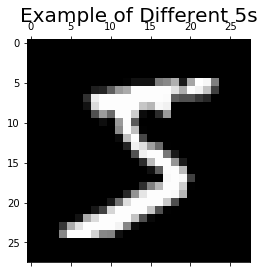

<Figure size 432x288 with 0 Axes>

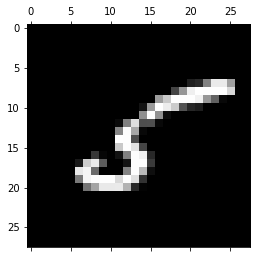

<Figure size 432x288 with 0 Axes>

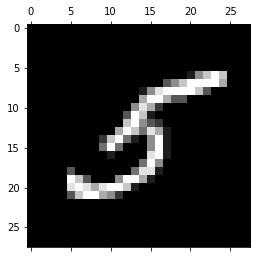

In [18]:
# Plotting the images of different 5's

import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(train_images[0]) 
plt.title('Example of Different 5s',fontsize=20)
plt.show()
plt.gray()
plt.matshow(train_images[4]) 
plt.show()
plt.gray()
plt.matshow(train_images[8]) 
plt.show()

<Figure size 432x288 with 0 Axes>

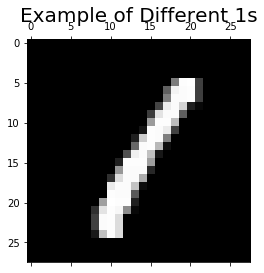

<Figure size 432x288 with 0 Axes>

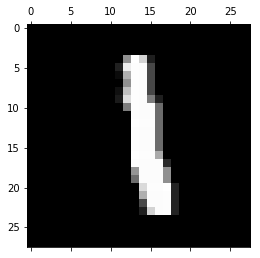

<Figure size 432x288 with 0 Axes>

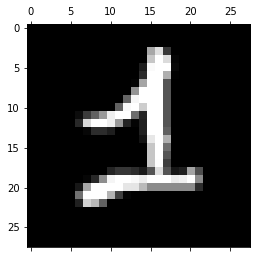

In [19]:
# Plotting the images of different 1's

plt.gray()
plt.matshow(train_images[1]) 
plt.title('Example of Different 1s',fontsize=20)
plt.show()
plt.gray()
plt.matshow(train_images[2]) 
plt.show()
plt.gray()
plt.matshow(train_images[7]) 
plt.show()

In [6]:
train = train_images.reshape(12163,28*28) # Reshaping the data to fit our analysis
test = test_images.reshape(2027,28*28)

# The Model

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import time

# Running the SVC classifier for different kernels

for kernel in ['linear','poly','rbf']:
    # Specifying the right parameters for the model as specified in the assignment
    classifier = SVC(kernel=kernel,gamma='scale', degree=2,class_weight='balanced')
    
    # clocking times
    start = time.time()
    classifier.fit(train,train_labels) # Fitting the data
    end = time.time()
    
    prediction = classifier.predict(test) # Predicting the test labels
    score = classifier.score(test,test_labels) # Test Score
    
    print('The Error Rate for the ', kernel, ' kernel is ', str(round((1-score)*100,2)), ' %' )
    print('The Training Time for the ', kernel, ' kernel is ', str(round(end-start,2)) ,' seconds' )
    print('\n')
    # Printing the relevant classification report and the confusion matrix
    print(classification_report(test_labels,prediction))
    print(confusion_matrix(test_labels,prediction))
    print('\n')
    print('\n')

The Error Rate for the  linear  kernel is  0.94  %
The Training Time for the  linear  kernel is  3.79  seconds


              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1135
           5       1.00      0.98      0.99       892

   micro avg       0.99      0.99      0.99      2027
   macro avg       0.99      0.99      0.99      2027
weighted avg       0.99      0.99      0.99      2027

[[1131    4]
 [  15  877]]




The Error Rate for the  poly  kernel is  0.05  %
The Training Time for the  poly  kernel is  4.03  seconds


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1135
           5       1.00      1.00      1.00       892

   micro avg       1.00      1.00      1.00      2027
   macro avg       1.00      1.00      1.00      2027
weighted avg       1.00      1.00      1.00      2027

[[1134    1]
 [   0  892]]




The Error Rate for the  rbf  kernel is  14.9  %
The Training T

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import time

error_rates = []
times = []
false_positives = []
false_negatives = []

for degree in range(1,10):
    
    # Running the polynomial classifier for different degrees
    
    classifier = SVC(kernel='poly', degree=degree,gamma='scale', class_weight='balanced')
    
    start = time.time()
    classifier.fit(train,train_labels) # Fitting the data
    end = time.time()
    score = classifier.score(test,test_labels) # Score of the model
    
    pred = classifier.predict(test)
    matrix = confusion_matrix(test_labels,pred) # Confusion matrix of the classifier
    
    false_positive = matrix[0][1]
    false_negative = matrix[1][0]
    
    error_rates.append(1-score) # Tracking the error rates
    times.append(end-start) # Clocking the total time
    
    false_positives.append(false_positive) # Recording the false positives and false negatives
    false_negatives.append(false_negative)
    
    print('Error Rate for degree',str(degree),':',str(1-score))
    print('Training Time for degree',str(degree),':',str(end-start))

Error Rate for degree 1 : 0.008880118401578652
Training Time for degree 1 : 3.647792100906372
Error Rate for degree 2 : 0.0004933399111988201
Training Time for degree 2 : 3.5117290019989014
Error Rate for degree 3 : 0.0009866798223976403
Training Time for degree 3 : 4.007347822189331
Error Rate for degree 4 : 0.003453379378391741
Training Time for degree 4 : 4.507737874984741
Error Rate for degree 5 : 0.005426739023187022
Training Time for degree 5 : 5.713617324829102
Error Rate for degree 6 : 0.010853478046373932
Training Time for degree 6 : 6.940680980682373
Error Rate for degree 7 : 0.017266896891958594
Training Time for degree 7 : 8.829185962677002
Error Rate for degree 8 : 0.020226936359151404
Training Time for degree 8 : 9.68336009979248
Error Rate for degree 9 : 0.024666995559940785
Training Time for degree 9 : 10.968111753463745


# Auto-tuning of the algorithms and comparative analysis

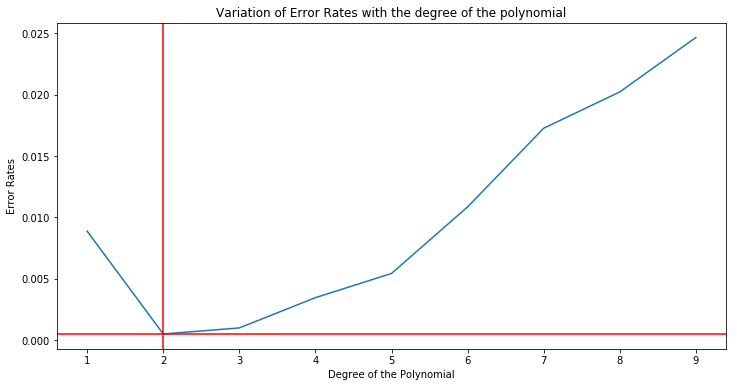

In [18]:
import matplotlib.pyplot as plt

# Plotting the error rates for different values of the polynomial degrees
plt.figure(figsize=(12,6))
plt.plot(range(1,10),error_rates)
plt.axhline(0.0004933399111988201,color='red')
plt.axvline(2,color='red')
plt.title('Variation of Error Rates with the degree of the polynomial')
plt.ylabel('Error Rates')
plt.xlabel('Degree of the Polynomial')
plt.show()

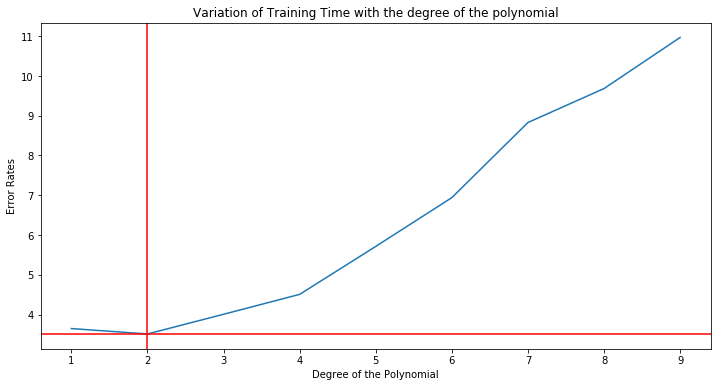

In [19]:
# Plotting the training times for different values of the polynomial degrees

plt.figure(figsize=(12,6))
plt.plot(range(1,10),times)
plt.axhline(3.5117290019989014,color='red')
plt.axvline(2,color='red')
plt.title('Variation of Training Time with the degree of the polynomial')
plt.ylabel('Error Rates')
plt.xlabel('Degree of the Polynomial')
plt.show()

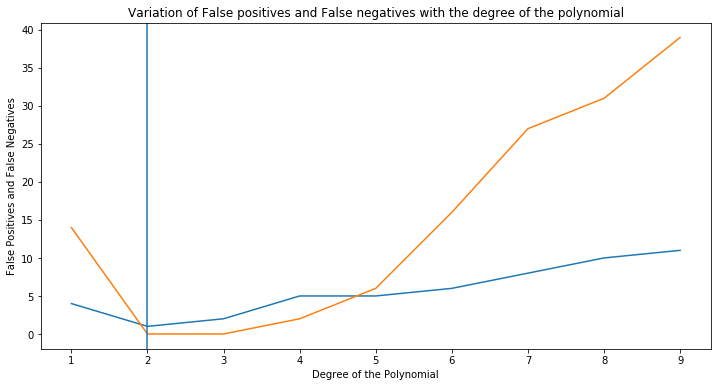

In [20]:
# Plotting the false positives and false negatives for different values of the polynomial degrees

plt.figure(figsize=(12,6))
plt.plot(range(1,10),false_positives)
plt.plot(range(1,10),false_negatives)
plt.axvline(2)
plt.title('Variation of False positives and False negatives with the degree of the polynomial')
plt.ylabel('False Positives and False Negatives')
plt.xlabel('Degree of the Polynomial')
plt.show()